## Rod Pump Analysis: Data Cleaning (Simplified)

### Load data and remove procedural identifiers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('../rodpump_raw.csv', parse_dates=['lifetime_start','lifetime_end'])

In [3]:
# Calculate lifetime from lifetime_start and lifetime_end
raw_data['lifetime'] = (raw_data['lifetime_end'] - raw_data['lifetime_start']).dt.days

# Remove procedural and redundant columns
del raw_data['FAILSTART']
del raw_data['NODEID']
del raw_data['IDWELL']
del raw_data['REPORTTO']
del raw_data['tbguid']
del raw_data['IDRECJOBPULL']

# Remove rows corresponding to columns 
raw_data = raw_data[raw_data['FAILURETYPE'].notnull()]

In [4]:
# Convert zero values to null where zero is used in place of nan

# QUESTIONABLE COLUMNS: H2S_CONCENTRATION
zero_to_null_columns = ['PrimarySetpoint',
                        'SecondarySetpoint',
                        'StrokeLength',
                        'GrossStrokeLength',
                        'Fillage',
                        'YesterdaysAverageSPM',
                        'max_unguided_dls',
                        'dls_high_in_hole',
                        'gas_anchor_length',
                        'MAX_INCLINATION',
                        'AVG_PRESSURE_TUBING',
                        'AVG_PRESSURE_CASING',
                        'AVG_DIFFERENTIAL_PRESSURE',
                        'AVG_OIL_VOLUME',
                        'AVG_WATER_VOLUME',
                        'AVG_LIQUID_VOLUME',
                        'overall_max_sideload',
                        'shallow_max_sideload',
                        'max_unguided_sideload',
                        'CHROME_LENGTH',
                        'ENDURALLOY_LENGTH',
                        'POLY_LENGTH'
                       ]

for column in zero_to_null_columns:
    raw_data[column].replace(to_replace=0, value=np.nan, inplace=True)

In [5]:
# Convert unknown values to null where a string key is used in place of nan
raw_data['packer_vs_tac'].replace(to_replace='OTHER_ANCHOR', value=None, inplace=True)
raw_data['packer_vs_tac'].replace(to_replace='OTHER_PACKER', value=None, inplace=True)
raw_data['rod_sinker_type'].replace(to_replace='UNKNOWN', value=None, inplace=True)
raw_data['rod_apigrade'].replace(to_replace='Unknown', value=None, inplace=True)
raw_data['DESANDDEGAS_TYP'].replace(to_replace='UNKNOWN', value=None, inplace=True)
raw_data['gasanchor_od'].replace(to_replace='OtherOrUnknown', value=None, inplace=True)
raw_data['pump_bore'].replace(to_replace='Other', value=np.nan, inplace=True)

<AxesSubplot:>

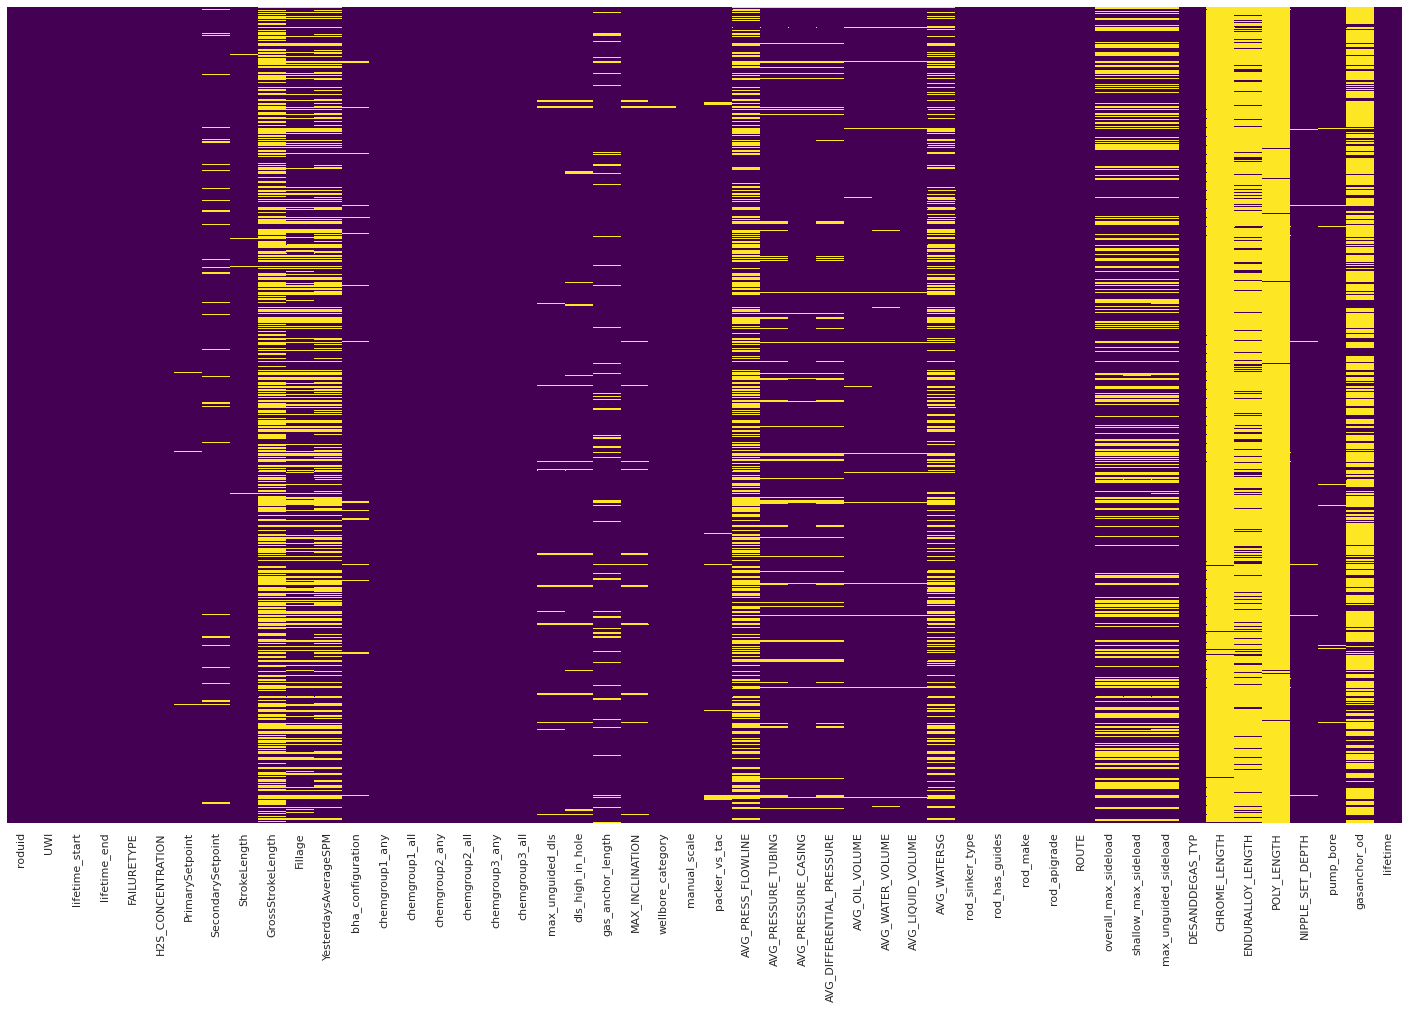

In [6]:
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
raw_data.to_csv('../data/transformed_raw.csv',index=False,header=True)